## Prediktívne modelovanie - regresia (pomocou lineárnej regresie)

V tomto príklade si demonštrujeme ukážku riešenia prediktívnej úlohy regresného typu - úlohy, kedy je predikovaný atribút spojitý. Spôsob modelovania a príravy na modelovanie korešponduje s klasifikačnými úlohami (spôsob rozdelenia dát na trénovacie a testovacie, trénovanie modelu). 

Najprv importujeme niektoré potrebné knižnice. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Načítanie datasetu Diabetes pomocou funkcie `load_diabetes`. Dataset v premennej `diabetes` obsahuje vektorizované dáta, v stĺpci `data` sú dáta zo vstupných atribútov, v stĺpci `target` hodnoty cieľového atribútu. 

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()


Pre lepšie zobrazenie dát si dáta môžeme previesť a zobraziť ako dátový rámec - pracovať však už môžeme priamo s vektorovou podobou dát. 
`diabetes['data']` obsahuje 10 stĺpcov, v ktorých sú zakódované hodnoty parametrov pacientov (Vek, Pohlavie, BMI index, priemerný krvný tlak, atď.). Predikovaná veličina `diabetes['target']` vyjadruje kvantitatívnu mieru progresu ochorenia rok po úvodnom meraní. 

In [3]:
df = pd.DataFrame(diabetes['data'])
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Pomocou funkcie `train_test_split` rozdelíme dáta do trénovacej a testovacej množiny. Keďže v `diabetes` už máme vektorizované dáta, v stĺpci `data` predikujúce atribúty a v stĺpci `target` predikovaný atribút, môžeme ich priamo priradiť do premenných X (matica príznakov) a y (vektor hodnôt cieľového atribútu)

In [4]:
from sklearn.model_selection import train_test_split

X = diabetes['data']
y = diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Importujeme knižnicu pre lineárny regresný model - lineárnu regresiu. Model inicializujeme a natrénujeme na trénovacej množine.

In [5]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)

Po netrénovaní môžeme model overiť na testovacej množine. Pomocou funkcie `predict` vypočítame predikcie pre dáta z testovacej množiny a uložíme ich do premennej `y_model`.  

Pre porovnanie skutočných hodnôt z testovacej množiny a predikovaných hodnôt môžeme vytvoriť tabuľku (ako Pandas dátový rámec), kde veľa seba vypíšeme skutočné hodnoty z testovacej množiny `y_test` a modelom predikované hodnoty `y_model`.

In [6]:
y_model = model.predict(X_test)

summary_df = pd.DataFrame()
summary_df['target'] = y_test
summary_df['prediction'] = y_model

print(summary_df)

     target  prediction
0     151.0  162.812735
1     135.0  123.482702
2      72.0   94.715355
3      72.0   88.875271
4     281.0  218.686138
..      ...         ...
128   232.0  191.215963
129   141.0  159.544738
130   108.0  105.435110
131    89.0  113.672531
132    53.0  131.105537

[133 rows x 2 columns]


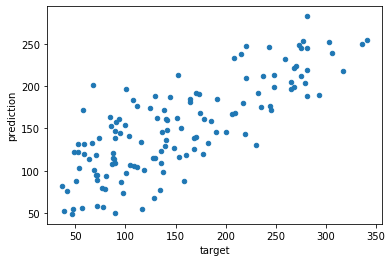

In [7]:
summary_df.plot(kind="scatter", x="target", y="prediction")

No handles with labels found to put in legend.


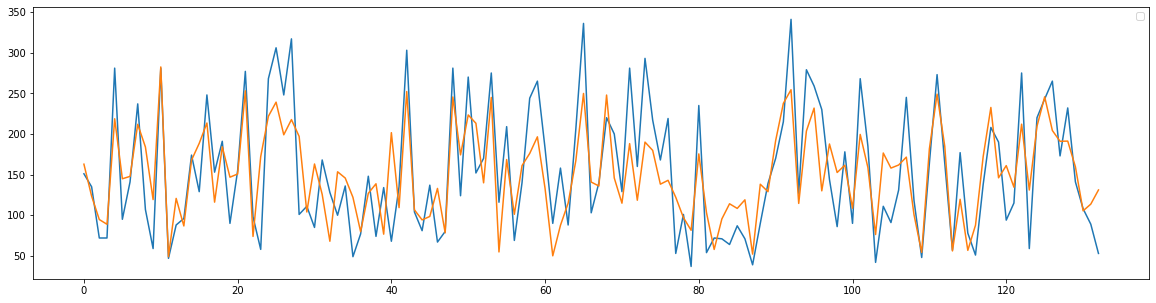

In [9]:
plt.figure(figsize=(20,5)) #špecifikujeme si šírku
plt.plot(y_test, label )
plt.plot(y_model, lable ) #ak ich dávam za sebou, tak dá im rozdielne farby

plt.legend(loc = 'upper right')

Podobne ako pri klasifikačných úlohách, môžeme z týchto výsledkov vypočítať viaceré metriky, ktoré umožňujú porovnať regresné modely, resp. vyjadriť kvalitu daného regresného modelu. Pre regresné modely sa používa niekoľko metrík:

* priemerná absoútna chyba - ukazuje veľkosť celkovej chyby, ktorá vznikla pri predikcie (veľké chyby nie sú v tomto ukazovateli penalizované)
* priemerná kvadratická chyba - veličina vyjadrujú přesnosť odhadov pomocou strednej hodnoty druhých mocnín rozdielov medzi predikovanou hodnotou a skutočnosťou (penalizuje extrémne chyby, alebo inými slovami, MSE je oveľa viac ovplyvnená veľkými chybami ako malými)
* R2 skóre - Koeficient determinácie, v rozsahu od 0 (žiadny lineárny vzťah) do 1 (absolútny lineárny vzťah, či už pozitívny alebo negatívny)


In [11]:
from sklearn.metrics import mean_absolute_error #mae - priemerná absolútna chyba
mae = mean_absolute_error(y_test, y_model) #zadávam skutočné a predikované hodnoty

from sklearn.metrics import mean_squared_error #mse - priemerná kvadratická chyba
mse = mean_squared_error(y_test, y_model)

from sklearn.metrics import r2_score #je to nejaký koeficient od 0-1, ktorý hovorí o vzájomnej závislosti, 1 lineárny, O nie je žiadna závislosť
r2 = r2_score(y_test, y_model)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

# MAE: +-40 od reálu

MAE: 40.50526150447213
MSE: 2395.0195707689927
R2 Score: 0.610123627517664
